## We plan to create 2 types of models, compare and then choose the best one.

## 1. Random Forest

### imports

In [10]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [11]:
# read the data
df_mean = pd.read_csv('assets/cleaned_train.csv')

In [12]:
#df_mean.info()
df_mean.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,29.833333,10.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000
1,2,29.083333,2.0,16.625,13.666667,17.375,21.333333,22.666667,20.375000,22.916667,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
2,3,30.750000,10.0,0.000,0.000000,0.000,8.500000,0.000000,0.000000,0.000000,...,0.801667,0.000000,0.000000,0.000000,2.062500,0.000000,0.000000,0.000000,0.000000,26.162014
3,4,28.153846,9.0,26.600,20.071429,25.800,30.269231,26.666667,21.090909,25.115385,...,1.015833,-1.125000,0.000000,0.500000,1.515625,7.029999,0.000000,0.000000,6.329994,4.064002
4,5,28.714286,13.0,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440


In [13]:
# Set data frames to be the inputs of the skit model
X = df_mean.iloc[:, :-1]
Y = df_mean.iloc[:, 23:]
Y = Y.values.ravel()

In [14]:
#   Scaling data frame
# scaling X
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# splits data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [16]:
# Fit the model

clf = RandomForestRegressor(random_state=42, max_depth=35, n_jobs=-1)
clf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=35, n_jobs=-1, random_state=42)

In [17]:
# Get predictions and evaluate performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Predicting values using the trained model
y_pred = clf.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print results 
# # MSE: A low MSE indicates that the model predicts the actual values more accurately.
print("Mean Squared Error (MSE):", mse)
# MAE: A low MAE indicates that the average error between predicted and actual values is small.
# In general, an MAE as close to 0 as possible is sought. 
print("Mean Absolute Error (MAE):", mae)
# R-squared: An R-squared value close to 1 
# indicates that the model explains a large proportion of the variability in the data.
print("R-squared:", r2)

rfr_m = [mse, mae, r2]

Mean Squared Error (MSE): 14802.15123722491
Mean Absolute Error (MAE): 32.486672054971365
R-squared: 0.5258692789469954


## Neural Network


In [18]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [19]:
# read the data
df_mean = pd.read_csv('assets/cleaned_train.csv')

In [20]:
# Set data frames to be the inputs of the skit model
X = df_mean.iloc[:, :-1]
Y = df_mean.iloc[:, 23:]
Y.describe()

,Expected
count,1.143831e+06
mean,3.681348e+01
std,1.774018e+02
min,1.000000e-02
25%,2.540001e-01
50%,1.016001e+00
75%,3.302002e+00
max,1.939799e+03


In [21]:
#   Scaling data frame
# scaling X
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
# splits data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [23]:
import numpy as np
# Ensure Y_train is a 2D array
Y_train = np.reshape(Y_train, (-1, 1))

In [24]:
print(X_train.shape, len(X_train), type(X_train))
print(Y_train.shape, len(Y_train), type(Y_train))

(1029447, 23) 1029447 <class 'numpy.ndarray'>
(1029447, 1) 1029447 <class 'numpy.ndarray'>


In [25]:
#!pip install keras-tuner

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError


input_shape = X_train.shape[1]

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from kerastuner.tuners import BayesianOptimization

def build_model(hp):
  """
    This function builds a sequential neural network model with hyperparameter tuning capabilities.

    Args:
    hp (HyperParameters): An instance of the HyperParameters class from Keras Tuner, 
                          used to define the search space for hyperparameters.

    Returns:
    model (Sequential): A compiled Keras Sequential model with the following architecture:
        - Input layer: Dense layer with units defined by hp.Int('units_1')
        - Hidden layer: Dense layer with units defined by hp.Int('units_2')
        - Output layer: Dense layer with 1 unit and linear activation

    The model is compiled with:
    - Optimizer: Adam with learning rate defined by hp.Choice('learning_rate')
    - Loss function: Mean Squared Error
    - Metrics: Mean Squared Error
  """


  model = Sequential()
  model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), input_shape=(input_shape,), activation='relu'))
  model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                loss='mean_squared_error',
                metrics=[MeanSquaredError()])
  return model

tuner = BayesianOptimization(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,  # Adjust the number of trials as needed
    executions_per_trial=2,  # Optional: Run each trial multiple times
    directory='my_dir',  # Optional: Specify a directory to save results
    project_name='my_project'
)

tuner.search(x=X_train, y=Y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, Y_train, epochs=100, validation_split=0.2)



Trial 10 Complete [00h 11m 26s]
val_mean_squared_error: 27310.1357421875

Best val_mean_squared_error So Far: 27160.859375
Total elapsed time: 01h 58m 04s
Epoch 1/100
25737/25737 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 29530.7715 - mean_squared_error: 29530.7715 - val_loss: 29154.5820 - val_mean_squared_error: 29154.5820
Epoch 2/100
25737/25737 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 27965.0391 - mean_squared_error: 27965.0391 - val_loss: 28190.4551 - val_mean_squared_error: 28190.4551
Epoch 3/100
25737/25737 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 27213.6641 - mean_squared_error: 27213.6641 - val_loss: 27714.6055 - val_mean_squared_error: 27714.6055
Epoch 4/100
25737/25737 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 27403.5039 - mean_squared_error: 27403.5039 - val_loss: 27495.4238 - val_mean_squared_error: 27495.4238
Epoch 5/100
25737/25737 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 27162.2344 - mean_squared_error: 27162.2344 - val_loss: 27454.0117 - val_mean_squared_error: 27454.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, R2Score

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
ann_m = [mse, mae, r2]

3575/3575 ━━━━━━━━━━━━━━━━━━━━ 3s 831us/step
Mean Squared Error (MSE): 25859.109556585772
Mean Absolute Error (MAE): 53.713868396919544
R-squared: 0.1717016100883484


##compare models

In [28]:
print(f'[mse, mae, r2]')
print(f'Random forest: {rfr_m} ,Training Time: 15m 75s')
print(f'NN (Keras): {ann_m} ,Training Time: 46m 52.1s')

[mse, mae, r2]
Random forest: [14802.15123722491, 32.486672054971365, 0.5258692789469954] ,Training Time: 15m 75s
NN (Keras): [25859.109556585772, 53.713868396919544, 0.1717016100883484] ,Training Time: 46m 52.1s


In [29]:
df_mean.describe()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
count,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,...,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06,1.143831e+06
mean,5.905290e+05,2.951543e+01,1.111097e+01,1.359739e+01,1.024417e+01,1.305656e+01,1.659723e+01,1.473956e+01,1.158177e+01,1.420925e+01,...,5.745400e-01,3.050305e-01,-3.482588e-01,1.106731e-01,1.122004e+00,2.300680e-02,-1.455163e+00,-3.865438e-01,1.929694e+00,3.681348e+01
std,3.408259e+05,1.696426e+00,4.233072e+00,1.216100e+01,1.074883e+01,1.212230e+01,1.354051e+01,1.295001e+01,1.177245e+01,1.293294e+01,...,5.044034e-01,8.368639e-01,6.607355e-01,5.735110e-01,1.407942e+00,1.901768e+00,2.310528e+00,1.434768e+00,3.018215e+00,1.774018e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,-2.841667e+01,-3.016667e+01,-2.858333e+01,-2.425000e+01,-2.516667e+01,-2.800000e+01,-2.541667e+01,...,0.000000e+00,-7.875000e+00,-7.875000e+00,-7.875000e+00,-7.875000e+00,-7.250000e+01,-4.749000e+01,-5.502000e+01,-1.002000e+02,1.000000e-02
25%,2.954395e+05,2.866667e+01,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-6.458333e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.659170e+00,-1.783345e-01,0.000000e+00,2.540001e-01
50%,5.906620e+05,2.953846e+01,1.200000e+01,1.520000e+01,9.833333e+00,1.433333e+01,1.825000e+01,1.644444e+01,1.192857e+01,1.558333e+01,...,9.919445e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.593750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.016001e+00
75%,8.858315e+05,3.040000e+01,1.400000e+01,2.333333e+01,1.920000e+01,2.292857e+01,2.734615e+01,2.507692e+01,2.128571e+01,2.469231e+01,...,1.026482e+00,4.553571e-01,0.000000e+00,2.000000e-01,1.921875e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.720001e+00,3.302002e+00
max,1.180945e+06,5.800000e+01,2.100000e+01,5.950000e+01,5.030769e+01,5.600000e+01,6.250000e+01,9.150000e+01,5.396154e+01,5.850000e+01,...,1.051667e+00,7.937500e+00,7.937500e+00,7.937500e+00,7.937500e+00,1.224400e+02,1.629990e+00,9.479996e+00,9.054001e+01,1.939799e+03


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    'Model': ['Random Forest', 'Neuronal Network'],
    'Mean Squared Error': [14802.15, 25709.02],
    'Mean Absolute Error: [32.49, 55.92]',
    'R.squared': [0.5259, 0.1756],
}

results_df = pd.DataFrame(results)
results_df.head()

SyntaxError: ':' expected after dictionary key (1639975863.py, line 7)

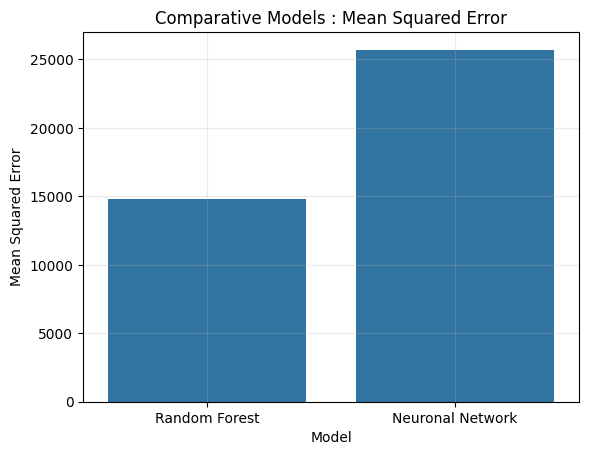

In [59]:
sns.barplot(x='Model', y='Mean Squared Error', data=results_df)
plt.title('Comparative Models : Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.25)
plt.show()

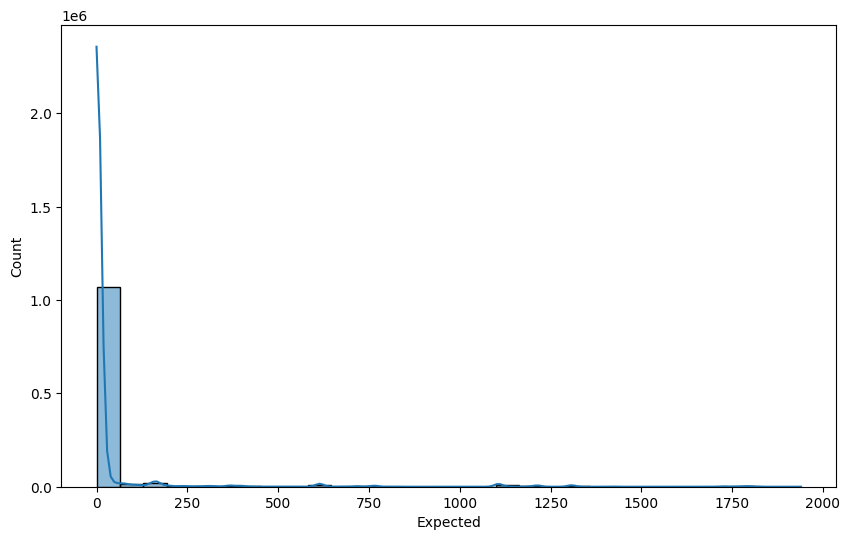

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df_mean['Expected'], bins=30, kde=True)
plt.show()

In [70]:
importances = clf.feature_importances_
X = df_mean.iloc[:, :-1]


[0.46965891 0.23986804 0.11389991 0.00625882 0.00270608 0.0051184
 0.02732111 0.00662276 0.0033764  0.00479963 0.04550649 0.00440116
 0.0028484  0.0040928  0.01189923 0.00670054 0.00245009 0.004355
 0.01431318 0.00570881 0.00280222 0.00467524 0.01061677]
Index(['Id', 'minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th'],
      dtype='object')
